We cannot work with the text data in machine learning so we need to convert them into numerical vectors, As a part of this practice exercise you will implement different techniques to do the same.

In this notebook we are going to understand some basic text cleaning steps and techniques for encoding text data. We are going to learn about
1. **Understanding the data** - See what's data is all about. what should be considered for cleaning for data (Punctuations , stopwords etc..).
2. **Basic Cleaning** -We will see what parameters need to be considered for cleaning of data (like Punctuations , stopwords etc..)  and its code.
3. **Techniques for Encoding** - All the popular techniques that are used for encoding that I personally came across.
    *           **Bag of Words**
    *           **Binary Bag of Words**
    *           **Bigram, Ngram**
    *           **TF-IDF**( **T**erm  **F**requency - **I**nverse **D**ocument **F**requency)
    *           **Word2Vec**
    *           **Emotion and Sentiment analysis**

# Import Libraries

Libraries used in this notebook along with their version:

google	2.0.3

nltk	3.2.5

numpy	1.18.3

pandas	1.0.3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [8]:
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit
import re
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline
from six import string_types
from string import punctuation

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
import os

# 1.Understanding the data

We will employ a text categorization dataset based on Reviews. Each article is assigned a specific captegory. 

Implement the code to load the dataset.(Hint: Use the pandas library to load the csv file.)

In [ ]:
# Solution
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/My_NLP/Session 1/Takehome/bbc-text.csv')

In [9]:
import os

# Define the path to the data folder
data_folder_path = os.path.join(os.pardir, 'data')

# Define the path to the text file
csv_file_path = os.path.join(data_folder_path, 'bbc-text.csv')

df = 


NameError: name 'text_file_path' is not defined

In [ ]:
# Sanity check: Your output should look like the below
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


#### Create a function called "complaint_to_words" to store each consumer complaint narrative .

In [ ]:
# Solution
complaint_to_words = df['text']  

# 2.Basic Cleaning

## 2.1.Tokenize

We will use the above function here to create a list of list that will store each complaint tokenized into separate words.(Hint: Use regular expression based tokenizer.)

In [ ]:
data_list = list()
for comp in complaint_to_words:
    data_list.append(RegexpTokenizer('\w+').tokenize(comp))

In [ ]:
print(data_list[:3]) # Example

[['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'ha

In [ ]:
for file_id in data_list[:3]:
  print(file_id)

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'has

## 2.2.Lower Case

In [ ]:
low=[]
for line in data_list:
  lines = list(map(lambda x : x.lower(),line))
  low.append(lines) 
print(low[:3])

[['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'ha

## 2.3.Removing Stopwords

Converting all words to lowercase and removing punctuations and html tags if any

**Stemming**- Converting the words into their base word or stem word ( Ex - tastefully, tasty,  these words are converted to stem word called 'tasti'). This reduces the vector dimension because we dont consider all similar words  

**Stopwords** - Stopwords are the unnecessary words that even if they are removed the sentiment of the sentence dosent change.

Ex -    This pasta is so tasty ==> pasta tasty    ( This , is, so are stopwords so they are removed)

To see all the stopwords see the below code cell.

### 2.3.1.Removing Punctuation

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Remove Punctuation
  
#stop_words = set(stopwords.words('english')) 
puncList = [";",":","!","?","/","\\",",","#","@","$","&",")","(","\""]

#word_tokens = word_tokenize(text_tokens) 

Punc_filtered_sentence = [] 

for lines in low:
  punc = []
  for w in lines: 
      if w not in puncList: 
          punc.append(w) 
  Punc_filtered_sentence.append(punc)

print(len(low[0])) 
print(len(Punc_filtered_sentence[0])) 

750
750


In [ ]:
print(low[0])

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'has

In [ ]:
print(Punc_filtered_sentence[0])

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'has

### 2.3.2.Removing the Stop Words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
    
stop_words = set(stopwords.words('english')) 
    
filtered_sentence = [] 

for lines in Punc_filtered_sentence:
  word = []
  for w in lines: 
      if w not in stop_words: 
          word.append(w) 
  filtered_sentence.append(word)

print(len(Punc_filtered_sentence[0])) 
print(len(filtered_sentence[0])) 

750
421


In [ ]:
print(Punc_filtered_sentence[0])

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'has

In [ ]:
print(filtered_sentence[0])

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'one', 'talked', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', 'dvr', 'pvr', 'set', 'top', 'boxes', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'als

## 2.4.Stemming & Lemitization

### 2.4.1.Stemming

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
#create an object of class PorterStemmer
porter = PorterStemmer()

In [ ]:
# Stemming

stemmed=[]
for line in filtered_sentence:
  lines = list(map(lambda x : porter.stem(x),line))
  stemmed.append(lines) 
print(len(filtered_sentence[0])) 
print(len(stemmed[0])) 

421
421


In [ ]:
print(filtered_sentence[0]) 

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'one', 'talked', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', 'dvr', 'pvr', 'set', 'top', 'boxes', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'als

In [ ]:
print(stemmed[0])

['tv', 'futur', 'hand', 'viewer', 'home', 'theatr', 'system', 'plasma', 'high', 'definit', 'tv', 'digit', 'video', 'record', 'move', 'live', 'room', 'way', 'peopl', 'watch', 'tv', 'radic', 'differ', 'five', 'year', 'time', 'accord', 'expert', 'panel', 'gather', 'annual', 'consum', 'electron', 'show', 'la', 'vega', 'discuss', 'new', 'technolog', 'impact', 'one', 'favourit', 'pastim', 'us', 'lead', 'trend', 'programm', 'content', 'deliv', 'viewer', 'via', 'home', 'network', 'cabl', 'satellit', 'telecom', 'compani', 'broadband', 'servic', 'provid', 'front', 'room', 'portabl', 'devic', 'one', 'talk', 'technolog', 'ce', 'digit', 'person', 'video', 'record', 'dvr', 'pvr', 'set', 'top', 'box', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'peopl', 'record', 'store', 'play', 'paus', 'forward', 'wind', 'tv', 'programm', 'want', 'essenti', 'technolog', 'allow', 'much', 'personalis', 'tv', 'also', 'built', 'high', 'definit', 'tv', 'set', 'big', 'busi', 'japan', 'us', 'slower', 'take', 'eu

### 2.4.2.Lemitization

In [ ]:
from nltk.stem import LancasterStemmer
lancaster=LancasterStemmer()

In [ ]:
# Lemitization

lemmitized=[]
for line in stemmed:
  lines = list(map(lambda x : lancaster.stem(x),line))
  lemmitized.append(lines) 
print(len(stemmed[0])) 
print(len(lemmitized[0])) 

421
421


In [ ]:
print(stemmed[0]) 

['tv', 'futur', 'hand', 'viewer', 'home', 'theatr', 'system', 'plasma', 'high', 'definit', 'tv', 'digit', 'video', 'record', 'move', 'live', 'room', 'way', 'peopl', 'watch', 'tv', 'radic', 'differ', 'five', 'year', 'time', 'accord', 'expert', 'panel', 'gather', 'annual', 'consum', 'electron', 'show', 'la', 'vega', 'discuss', 'new', 'technolog', 'impact', 'one', 'favourit', 'pastim', 'us', 'lead', 'trend', 'programm', 'content', 'deliv', 'viewer', 'via', 'home', 'network', 'cabl', 'satellit', 'telecom', 'compani', 'broadband', 'servic', 'provid', 'front', 'room', 'portabl', 'devic', 'one', 'talk', 'technolog', 'ce', 'digit', 'person', 'video', 'record', 'dvr', 'pvr', 'set', 'top', 'box', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'peopl', 'record', 'store', 'play', 'paus', 'forward', 'wind', 'tv', 'programm', 'want', 'essenti', 'technolog', 'allow', 'much', 'personalis', 'tv', 'also', 'built', 'high', 'definit', 'tv', 'set', 'big', 'busi', 'japan', 'us', 'slower', 'take', 'eu

In [ ]:
print(lemmitized[0])

['tv', 'fut', 'hand', 'view', 'hom', 'the', 'system', 'plasm', 'high', 'definit', 'tv', 'digit', 'video', 'record', 'mov', 'liv', 'room', 'way', 'peopl', 'watch', 'tv', 'rad', 'diff', 'fiv', 'year', 'tim', 'accord', 'expert', 'panel', 'gath', 'an', 'cons', 'electron', 'show', 'la', 'veg', 'discuss', 'new', 'technolog', 'impact', 'on', 'favourit', 'pastim', 'us', 'lead', 'trend', 'program', 'cont', 'del', 'view', 'via', 'hom', 'network', 'cabl', 'satellit', 'telecom', 'compan', 'broadband', 'serv', 'provid', 'front', 'room', 'port', 'dev', 'on', 'talk', 'technolog', 'ce', 'digit', 'person', 'video', 'record', 'dvr', 'pvr', 'set', 'top', 'box', 'lik', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'peopl', 'record', 'stor', 'play', 'pau', 'forward', 'wind', 'tv', 'program', 'want', 'essent', 'technolog', 'allow', 'much', 'person', 'tv', 'also', 'built', 'high', 'definit', 'tv', 'set', 'big', 'bus', 'jap', 'us', 'slow', 'tak', 'europ', 'lack', 'high', 'definit', 'program', 'peopl', 'forwar

## 2.5.PoS

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.pos_tag(lemmitized[0])

[('tv', 'NN'),
 ('fut', 'NNS'),
 ('hand', 'NN'),
 ('view', 'NN'),
 ('hom', 'VBP'),
 ('the', 'DT'),
 ('system', 'NN'),
 ('plasm', 'JJ'),
 ('high', 'JJ'),
 ('definit', 'NN'),
 ('tv', 'NN'),
 ('digit', 'NN'),
 ('video', 'NN'),
 ('record', 'NN'),
 ('mov', 'NN'),
 ('liv', 'JJ'),
 ('room', 'NN'),
 ('way', 'NN'),
 ('peopl', 'JJ'),
 ('watch', 'NN'),
 ('tv', 'NN'),
 ('rad', 'NN'),
 ('diff', 'NN'),
 ('fiv', 'JJ'),
 ('year', 'NN'),
 ('tim', 'NN'),
 ('accord', 'NN'),
 ('expert', 'NN'),
 ('panel', 'NN'),
 ('gath', 'NN'),
 ('an', 'DT'),
 ('cons', 'NNS'),
 ('electron', 'VBP'),
 ('show', 'NN'),
 ('la', 'NN'),
 ('veg', 'FW'),
 ('discuss', 'VB'),
 ('new', 'JJ'),
 ('technolog', 'NN'),
 ('impact', 'NN'),
 ('on', 'IN'),
 ('favourit', 'NN'),
 ('pastim', 'NN'),
 ('us', 'PRP'),
 ('lead', 'JJ'),
 ('trend', 'NN'),
 ('program', 'NN'),
 ('cont', 'JJ'),
 ('del', 'NN'),
 ('view', 'NN'),
 ('via', 'IN'),
 ('hom', 'NN'),
 ('network', 'NN'),
 ('cabl', 'NN'),
 ('satellit', 'NN'),
 ('telecom', 'NN'),
 ('compan', 'NN'),
 

In [ ]:
final_X = stemmed

In [ ]:
print(final_X[1])

['worldcom', 'boss', 'left', 'book', 'alon', 'form', 'worldcom', 'boss', 'bern', 'eb', 'acc', 'overs', '11bn', '5', '8bn', 'fraud', 'nev', 'mad', 'account', 'dec', 'wit', 'told', 'jur', 'david', 'myer', 'mad', 'com', 'quest', 'def', 'lawy', 'argu', 'mr', 'eb', 'respon', 'worldcom', 'problem', 'phon', 'compan', 'collap', '2002', 'prosecut', 'claim', 'loss', 'hid', 'protect', 'firm', 'shar', 'mr', 'myer', 'alread', 'plead', 'guilt', 'fraud', 'assist', 'prosecut', 'monday', 'def', 'lawy', 'reid', 'weingart', 'tri', 'dist', 'cli', 'alleg', 'cross', 'examin', 'ask', 'mr', 'myer', 'ev', 'knew', 'mr', 'eb', 'mak', 'account', 'dec', 'aw', 'mr', 'myer', 'repl', 'ev', 'know', 'mr', 'eb', 'mak', 'account', 'entr', 'worldcom', 'book', 'mr', 'weingart', 'press', 'repl', 'wit', 'mr', 'myer', 'admit', 'ord', 'fal', 'account', 'entr', 'request', 'form', 'worldcom', 'chief', 'financ', 'off', 'scot', 'sul', 'def', 'lawy', 'tri', 'paint', 'mr', 'sul', 'admit', 'fraud', 'testif', 'lat', 'tri', 'mastermind

In [ ]:
sent = []
for row in final_X:
    sequ = ''
    for word in row:
        sequ = sequ + ' ' + word
    sent.append(sequ)

final_X = sent
print(final_X[1])

 worldcom boss left book alon form worldcom boss bern eb acc overs 11bn 5 8bn fraud nev mad account dec wit told jur david myer mad com quest def lawy argu mr eb respon worldcom problem phon compan collap 2002 prosecut claim loss hid protect firm shar mr myer alread plead guilt fraud assist prosecut monday def lawy reid weingart tri dist cli alleg cross examin ask mr myer ev knew mr eb mak account dec aw mr myer repl ev know mr eb mak account entr worldcom book mr weingart press repl wit mr myer admit ord fal account entr request form worldcom chief financ off scot sul def lawy tri paint mr sul admit fraud testif lat tri mastermind behind worldcom account hou card mr eb team meanwhil look portray aff boss admiss pe gradu econom whatev abl mr eb transform worldcom rel unknown 160bn telecom giant invest darl lat 1990 worldcom problem mount howev competit increa telecom boom pet firm fin collap sharehold lost 180bn 20 000 work lost job mr eb tri expect last two mon found guilt form ceo fa

# Save the data

In [ ]:
data = pd.DataFrame()
data['category'] = list(df['category'])
data['Text'] = final_X

In [ ]:
print(data)

           category                                               Text
0              tech   tv fut hand view hom the system plasm high de...
1          business   worldcom boss left book alon form worldcom bo...
2             sport   tig war farrel gambl leicest say rush mak bid...
3             sport   yead fac newcastl fa cup premy sid newcastl u...
4     entertainment   oc twelv raid box off oc twelv crim cap seque...
...             ...                                                ...
2220       business   car pul us retail fig us retail sal fel 0 3 j...
2221       politics   kilroy unveil immigr polic ex chatshow host r...
2222  entertainment   rem annount new glasgow concert us band rem a...
2223       politics   polit squabbl snowb becom commonplac argu bla...
2224          sport   sou delight euro progress boss graem sou felt...

[2225 rows x 2 columns]


In [ ]:
data.to_csv('S1TakeHome.csv', index=False, encoding='utf-8')

# Load the data

In [ ]:
data = pd.read_csv('/content/S1TakeHome.csv')
data

,category,Text
0,tech,tv fut hand view hom the system plasm high de...
1,business,worldcom boss left book alon form worldcom bo...
2,sport,tig war farrel gambl leicest say rush mak bid...
3,sport,yead fac newcastl fa cup premy sid newcastl u...
4,entertainment,oc twelv raid box off oc twelv crim cap seque...
...,...,...
2220,business,car pul us retail fig us retail sal fel 0 3 j...
2221,politics,kilroy unveil immigr polic ex chatshow host r...
2222,entertainment,rem annount new glasgow concert us band rem a...
2223,politics,polit squabbl snowb becom commonplac argu bla...


We will employ a text categorization dataset based on BBC articles. Each article is assigned a specific captegory. 

Implement the code to load the dataset.(Hint: Use the pandas library to load the csv file.)

In [ ]:
# Sanity check: Your output should look like the below
data.head()

,category,Text
0,tech,tv fut hand view hom the system plasm high de...
1,business,worldcom boss left book alon form worldcom bo...
2,sport,tig war farrel gambl leicest say rush mak bid...
3,sport,yead fac newcastl fa cup premy sid newcastl u...
4,entertainment,oc twelv raid box off oc twelv crim cap seque...


# 3.Techniques for Encoding

3. **Techniques for Encoding**

      **BAG OF WORDS**
      
      In BoW we construct a dictionary that contains set of all unique words from our text review dataset.The frequency of the word is counted here. if there are **d** unique words in our dictionary then for every sentence or review the vector will be of length **d** and count of word from review is stored at its particular location in vector. The vector will be highly sparse in such case.
      
      Ex. pasta is tasty and pasta is good
      
     **[0]....[1]............[1]...........[2]..........[2]............[1]..........**             <== Its vector representation ( remaining all dots will be represented as zeroes)
     
     **[a]..[and].....[good].......[is].......[pasta]....[tasty].......**            <==This is dictionary
      .
      
    Using scikit-learn's CountVectorizer we can get the BoW and check out all the parameters it consists of, one of them is max_features =5000 it tells about to consider only top 5000 most frequently repeated words to place in a dictionary. so our dictionary length or vector length will be only 5000
    


   **BINARY BAG OF WORDS**
    
   In binary BoW, we dont count the frequency of word, we just place **1** if the word appears in the review or else **0**. In CountVectorizer there is a parameter **binary = true** this makes our BoW to binary BoW.
   
  

In [ ]:
final_X = data['Text']

###Create a function called "count_vect" to convert each review text to individual tokens.

In [ ]:
# Here we use the CountVectorizer from sklearn to create bag of words
count_vect = CountVectorizer(max_features=5000)
bow_data = count_vect.fit_transform(final_X)
print(bow_data[1])

  (0, 4443)	2
  (0, 1071)	1
  (0, 2961)	1
  (0, 4537)	1
  (0, 2732)	2
  (0, 3489)	1
  (0, 1800)	2
  (0, 691)	2
  (0, 4937)	1
  (0, 2564)	1
  (0, 3000)	12
  (0, 342)	1
  (0, 0)	1
  (0, 1649)	2
  (0, 952)	1
  (0, 2325)	1
  (0, 4941)	8
  (0, 704)	3
  (0, 2637)	1
  (0, 338)	1
  (0, 1849)	3
  (0, 604)	1
  (0, 1535)	7
  (0, 242)	1
  (0, 3245)	1
  :	:
  (0, 1975)	1
  (0, 2396)	1
  (0, 1261)	1
  (0, 63)	1
  (0, 2990)	1
  (0, 2248)	1
  (0, 1076)	1
  (0, 693)	1
  (0, 3359)	1
  (0, 1789)	1
  (0, 4021)	1
  (0, 76)	1
  (0, 2463)	1
  (0, 1686)	1
  (0, 2607)	1
  (0, 4644)	1
  (0, 1861)	1
  (0, 913)	1
  (0, 1711)	1
  (0, 4330)	1
  (0, 2435)	1
  (0, 3991)	1
  (0, 1801)	1
  (0, 1290)	1
  (0, 2357)	1


 **Drawbacks of BoW/ Binary BoW**
 
 Our main objective in doing these text to vector encodings is that similar meaning text vectors should be close to each other, but in some cases this may not possible for Bow
 
For example, if we consider two reviews **This pasta is very tasty** and **This pasta is not tasty** after stopwords removal both sentences will be converted to **pasta tasty** so both giving exact same meaning.

The main problem is here we are not considering the front and back words related to every word, here comes Bigram and Ngram techniques.

## 3.1.N-gram

### 3.1.1.**BI-GRAM BOW**

Considering pair of words for creating dictionary is Bi-Gram , Tri-Gram means three consecutive words so as NGram.

CountVectorizer has a parameter **ngram_range** if assigned to (1,2) it considers Bi-Gram BoW

But this massively increases our dictionary size 

In [ ]:
final_B_X = final_X

In [ ]:
count_vect = CountVectorizer(ngram_range=(1,2))
Bigram_data = count_vect.fit_transform(final_B_X)
print(Bigram_data[1])

  (0, 287072)	2
  (0, 65879)	1
  (0, 187417)	1
  (0, 293414)	1
  (0, 172265)	2
  (0, 222303)	1
  (0, 114359)	2
  (0, 43437)	2
  (0, 318732)	1
  (0, 159995)	1
  (0, 190238)	12
  (0, 20589)	1
  (0, 7)	1
  (0, 102651)	2
  (0, 58518)	1
  (0, 146435)	1
  (0, 319902)	8
  (0, 44111)	3
  (0, 165279)	1
  (0, 20351)	1
  (0, 118003)	3
  (0, 38963)	1
  (0, 94835)	7
  (0, 12479)	1
  (0, 206145)	1
  :	:
  (0, 63530)	1
  (0, 261127)	1
  (0, 172269)	1
  (0, 2715)	1
  (0, 4006)	1
  (0, 388)	1
  (0, 319080)	1
  (0, 172353)	1
  (0, 155706)	1
  (0, 94875)	1
  (0, 297372)	1
  (0, 105581)	1
  (0, 162602)	1
  (0, 300037)	1
  (0, 187601)	1
  (0, 119066)	1
  (0, 132813)	1
  (0, 118079)	1
  (0, 55355)	1
  (0, 107371)	1
  (0, 279505)	1
  (0, 154379)	1
  (0, 257979)	1
  (0, 114911)	1
  (0, 82152)	1


## 3.2.TF-IDF

**Term Frequency -  Inverse Document Frequency** it makes sure that less importance is given to most frequent words and also considers less frequent words.

**Term Frequency** is number of times a **particular word(W)** occurs in a review divided by totall number of words **(Wr)** in review. The term frequency value ranges from 0 to 1.

**Inverse Document Frequency** is calculated as **log(Total Number of Docs(N) / Number of Docs which contains particular word(n))**. Here Docs referred as Reviews.


**TF-IDF** is **TF * IDF** that is **(W/Wr)*LOG(N/n)**


 Using scikit-learn's tfidfVectorizer we can get the TF-IDF.

So even here we get a TF-IDF value for every word and in some cases it may consider different meaning reviews as similar after stopwords removal. so to over come we can use BI-Gram or NGram.

In [ ]:
final_tf = final_X
tf_idf = TfidfVectorizer(max_features=5000)
tf_data = tf_idf.fit_transform(final_tf)
print(tf_data[1])

  (0, 2357)	0.053998575236851074
  (0, 1290)	0.04735320489025118
  (0, 1801)	0.06113847397992787
  (0, 3991)	0.03761521543600182
  (0, 2435)	0.047696593238127
  (0, 4330)	0.050038866991833506
  (0, 1711)	0.028348795751903327
  (0, 913)	0.06597983872295728
  (0, 1861)	0.029595454361795392
  (0, 4644)	0.02004915993668257
  (0, 2607)	0.019290906946747503
  (0, 1686)	0.02487146695640509
  (0, 2463)	0.03359288032200236
  (0, 76)	0.03303127770729499
  (0, 4021)	0.04508849915216427
  (0, 1789)	0.024460877595589577
  (0, 3359)	0.04029808602089793
  (0, 693)	0.04860875490898975
  (0, 1076)	0.03350446178332555
  (0, 2248)	0.02752840642957251
  (0, 2990)	0.05501257655123274
  (0, 63)	0.04860875490898975
  (0, 1261)	0.06597983872295728
  (0, 2396)	0.03377202738544144
  (0, 1975)	0.03716589264234024
  :	:
  (0, 3245)	0.059368296638317865
  (0, 242)	0.035759069505679926
  (0, 1535)	0.4326228598951786
  (0, 604)	0.06180326569931124
  (0, 1849)	0.07188275694032832
  (0, 338)	0.04593560884358774
  (0, 

We will use the above function here to create a list of list that will store each complaint tokenized into separate words.

In [ ]:
data_list = list()
for comp in data['Text']:
    data_list.append(RegexpTokenizer('\w+').tokenize(comp))

## 3.3.Word2Vec

Next step is to import the Word2Vec model from gensim.

Gensim is a free to use python library. It provides APIs to solve various problems relating to natural language processing. It is fast, scalable and robust.

In this practice exercise we will train our own Word2Vec model using gensim Word2Vec API. Objectives of this practice exercise are, 


1.   Train your word2vec word embedding model.
2.   Visualize trained word embedding model using principal component analysis.


First step will be to load the corpus, clean it and tokenize it.

Libraries used in this notebook along with their version:

google	2.0.3

matplotlib	3.2.1

numpy	1.18.3

pandas	1.0.3

In [ ]:
from gensim.models import Word2Vec

#### Create your own model using the data_list defined above and gensim Word2Vec API. 
(Hint: https://radimrehurek.com/gensim/models/word2vec.html)

In [ ]:
# Solution
model = Word2Vec(stemmed, min_count=1, size=100)

In [ ]:
# Loading the vectors for each word in varaible "x"
x = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


#### Use PCA algorithm from sklearn to convert high dimesnional word embeddings to two diemnsions and save them in the variable "results".

In [ ]:
# Solution
pca = PCA(n_components=2)
result = pca.fit_transform(x)

Visualizing the word embeddings.

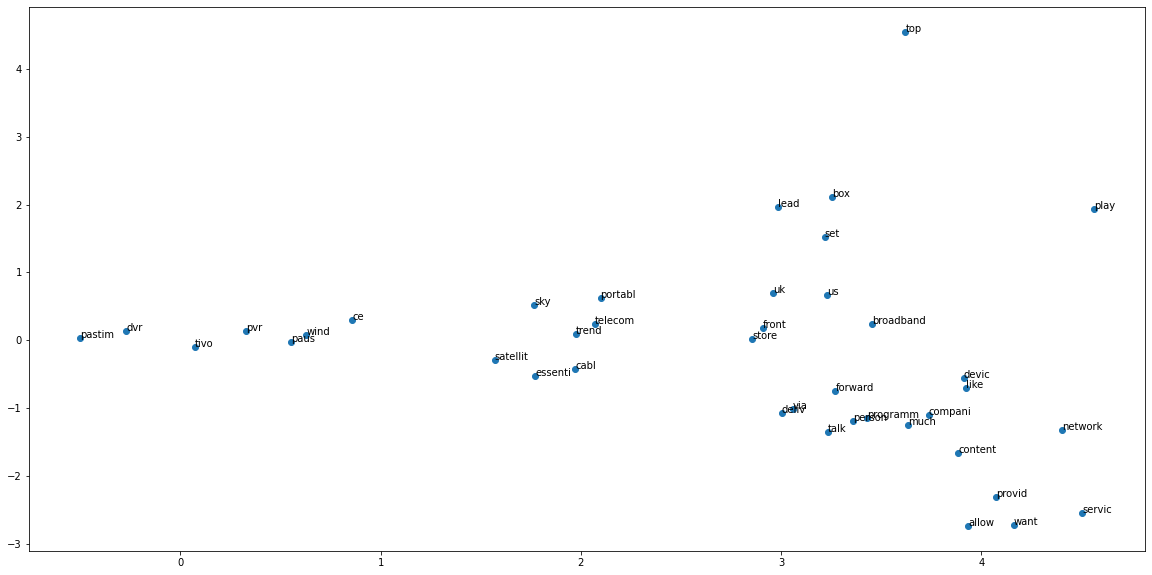

In [ ]:
pyplot.figure(figsize = (20, 10))
pyplot.scatter(result[40:80, 0], result[40:80, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[40:80]):
	pyplot.annotate(word, xy=(result[40 + i, 0], result[40 + i, 1]))
pyplot.show()

In [ ]:
sentence = str(data['Text'][1])

In [ ]:
sentence

' worldcom boss left book alon form worldcom boss bern eb acc overs 11bn 5 8bn fraud nev mad account dec wit told jur david myer mad com quest def lawy argu mr eb respon worldcom problem phon compan collap 2002 prosecut claim loss hid protect firm shar mr myer alread plead guilt fraud assist prosecut monday def lawy reid weingart tri dist cli alleg cross examin ask mr myer ev knew mr eb mak account dec aw mr myer repl ev know mr eb mak account entr worldcom book mr weingart press repl wit mr myer admit ord fal account entr request form worldcom chief financ off scot sul def lawy tri paint mr sul admit fraud testif lat tri mastermind behind worldcom account hou card mr eb team meanwhil look portray aff boss admiss pe gradu econom whatev abl mr eb transform worldcom rel unknown 160bn telecom giant invest darl lat 1990 worldcom problem mount howev competit increa telecom boom pet firm fin collap sharehold lost 180bn 20 000 work lost job mr eb tri expect last two mon found guilt form ceo f

In [ ]:
sentence_nlp = sentence

In [ ]:
sentence_nlp

' worldcom boss left book alon form worldcom boss bern eb acc overs 11bn 5 8bn fraud nev mad account dec wit told jur david myer mad com quest def lawy argu mr eb respon worldcom problem phon compan collap 2002 prosecut claim loss hid protect firm shar mr myer alread plead guilt fraud assist prosecut monday def lawy reid weingart tri dist cli alleg cross examin ask mr myer ev knew mr eb mak account dec aw mr myer repl ev know mr eb mak account entr worldcom book mr weingart press repl wit mr myer admit ord fal account entr request form worldcom chief financ off scot sul def lawy tri paint mr sul admit fraud testif lat tri mastermind behind worldcom account hou card mr eb team meanwhil look portray aff boss admiss pe gradu econom whatev abl mr eb transform worldcom rel unknown 160bn telecom giant invest darl lat 1990 worldcom problem mount howev competit increa telecom boom pet firm fin collap sharehold lost 180bn 20 000 work lost job mr eb tri expect last two mon found guilt form ceo f

In [ ]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 4.Emotion and Sentiment Analysis

In [ ]:
pip install afinn

In [ ]:
from afinn import Afinn

In [ ]:
af = Afinn()

In [ ]:
sentiment_scores = [af.score(article) for article in data['Text']]

In [ ]:
sentiment_category = ['positive' if score > 3 
                          else 'negative' if score < 3 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [ ]:
df = pd.DataFrame([list(data['category']), sentiment_scores, sentiment_category]).T

In [ ]:
df.columns = ['category', 'sentiment_score', 'sentiment_category']

In [ ]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [ ]:
df.groupby(by=['category']).describe()

sentiment_score                        ...                  
                        count       mean        std  ...  50%   75%    max
category                                             ...                  
business                510.0  -2.094118  11.757160  ... -1.0   4.0   52.0
entertainment           386.0  14.064767  30.451212  ...  8.0  18.0  375.0
politics                417.0  -5.254197  14.058519  ... -4.0   2.0   71.0
sport                   511.0   8.168297  14.270601  ...  6.0  15.5   70.0
tech                    401.0  -0.256858  16.562046  ...  2.0   9.0   63.0

[5 rows x 8 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

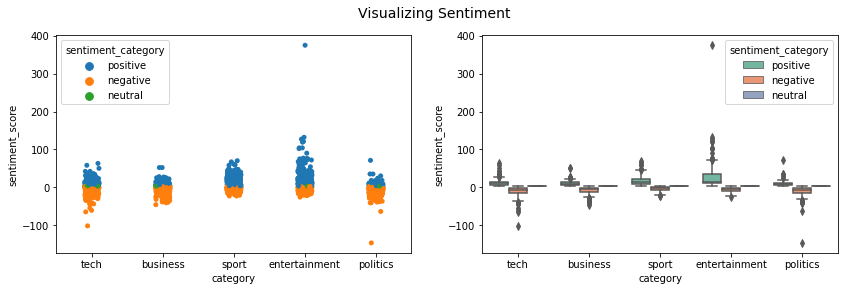

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='category', y="sentiment_score",  hue='sentiment_category', data=df, ax=ax1)
bp = sns.boxplot(x='category', y="sentiment_score", hue='sentiment_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Sentiment', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


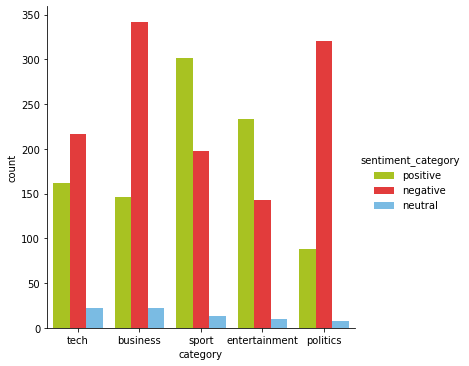

In [ ]:
fc = sns.factorplot(x="category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [ ]:
pos_idx = df[(df.category=='tech') & (df.sentiment_score == df[(df.category=='tech')].sentiment_score.max())].index[0]

In [ ]:
neg_idx = df[(df.category=='tech') & (df.sentiment_score == df[(df.category=='tech')].sentiment_score.min())].index[0]

In [ ]:
neg_idx

1189

In [ ]:
print('Most Negative Tech Article:', data['Text'][neg_idx])

print()
print('Most Positive Tech Article:', data['Text'][pos_idx])

Most Negative Tech Article:  cal act internet scam phon compan enough warn custom internet rog dial scam accord prem phon lin reg icst receiv 45 000 complaint rec mon dial internet connect divert prem rat numb without us knowledg phon compan ref pay comp say cal must paid must warn peopl ear poss fraud icst said peopl us dial connect affect scam without real program download divert internet cal via prem phon lin victim oft fail not receiv unusu high bil icst spokesm rob dwight said phon compan get touch custom soon bil goe us 50 mon want know straight away want told hit 750 phon compan system plac spot fraud act artific infl traff said alert numb investig look numb ad telecom ombudsm elizabe frant said certainl would surpr find credit card compan phon some ordinar would expect phon compan look see simil approach biggest phon compan bt say monit fraud warn peopl rog dial adv custom us cal bar want prev cal prem lin cur system cal mad littl don gavin patterson group man direct bt cons sa

In [ ]:
df1 = df[df.category=='politics']
pd.unique(df1.sentiment_score)

array([  -5.,    0.,    2.,  -35.,    7.,    1.,    9.,  -13.,   -3.,
         10.,  -16.,   -4.,   -2.,    8.,  -27.,   13.,    6.,  -21.,
         18.,  -29.,    4.,    5.,  -23.,   -9.,   -8.,  -19.,  -11.,
         -1.,   16.,  -12.,  -18.,  -24.,  -14.,   -7.,  -39., -147.,
        -20.,   -6.,  -25.,  -17.,   11.,    3.,  -10.,   24.,   35.,
        -41.,  -26.,  -64.,  -22.,  -15.,  -32.,  -31.,   14.,   12.,
        -37.,  -33.,   71.,  -28.,  -38.,  -30.,   30.])

In [ ]:
pos_idx = df[(df.category=='politics') & (df.sentiment_score == 5)].index[0]
neg_idx = df[(df.category=='politics') & (df.sentiment_score == 30.)].index[0]

print('Most Negative political Article:', data.iloc[neg_idx][['Text']][0])
print()
print('Most Positive political Article:', data.iloc[pos_idx][['Text']][0])

Most Negative political Article:  howard rebut asyl crit tor lead michael howard gon off respon peopl quest son immigr propo asyl quot mr howard whos par fled naz threat com uk say claim would mean on immigr famil could becom premy com com bbc documentar cal mr nast tv pres an robinson said hom secretar gav impress would lik kick cat ms robinson friend tor lead also rev cambridg stud mr howard much lov wom courteou kind rath dash lov although den person exper cambridg person exper know peopl documentar mak michael cockerel giv behind scen access mr howard film portrait tor lead ask respond peopl said quot immigr asyl 1930 par might allow countr repl inf reach view nee control immigr interest countr allow put view forward hap descend immigr seem absolv extraordinar proposit would certainl mean on immigr par could prim min ms robinson pres weakest link tel cockerel despair hardlin im hom secretar john maj govern us sit hand get telev giv pass impress someon lik kick cat would put bab pri

In [ ]:
from textblob import TextBlob

In [ ]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in data['Text']]

In [ ]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [ ]:
df = pd.DataFrame([list(data['category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['category']).describe()

sentiment_score                      ...                       
                        count      mean       std  ...     50%     75%    max
category                                           ...                       
business                510.0  0.026808  0.122986  ...  0.0225  0.0920  0.575
entertainment           386.0  0.147199  0.186464  ...  0.1175  0.2445  0.800
politics                417.0  0.080916  0.166758  ...  0.0610  0.2010  0.860
sport                   511.0  0.110648  0.146961  ...  0.1100  0.1990  0.688
tech                    401.0  0.032489  0.121398  ...  0.0250  0.0950  0.625

[5 rows x 8 columns]

In [ ]:
df.head()

,category,sentiment_score,sentiment_category
0,tech,0.045,positive
1,business,-0.205,negative
2,sport,-0.133,negative
3,sport,-0.010,negative
4,entertainment,0.100,positive


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


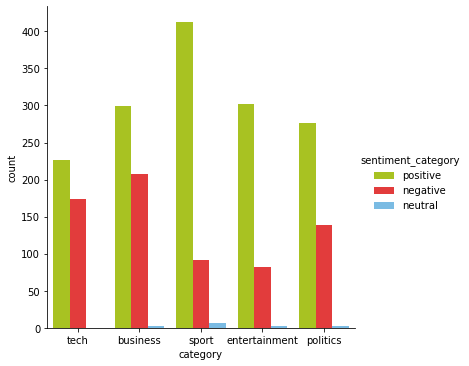

In [ ]:
fc = sns.factorplot(x="category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [ ]:
from sklearn.metrics import confusion_matrix
true_labels=sentiment_category
predicted_labels=sentiment_category_tb
confusion_matrix(true_labels, predicted_labels)

array([[581,  10, 629],
       [ 18,   1,  56],
       [ 96,   2, 832]])

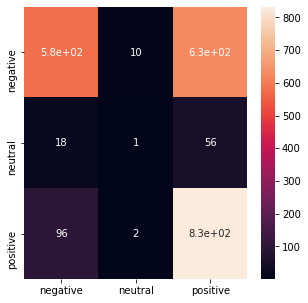

In [ ]:
plt.figure(figsize = (5,5))
conf = pd.DataFrame(confusion_matrix(true_labels, predicted_labels),
            index = ['negative', 'neutral', 'positive'],
                  columns = ['negative', 'neutral', 'positive'])
sns.heatmap(conf, annot=True)